## Intro to Data Visualization with Python

## Part 2


###  Step. 1 📟 Importing libraries and Datsset

In [43]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [71]:
# Tell Python to remember a main folder path
path = r'/Users/ashwanisherawat/Downloads/Instacart Basket Analysis/02 Data'

In [72]:
path

'/Users/ashwanisherawat/Downloads/Instacart Basket Analysis/02 Data'

In [46]:
# Import and identify dataframes
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'ords_prods_customer_merge.pkl'))

### Step 2. Creating visualisations 

### Histogram: Order Hour of the Day

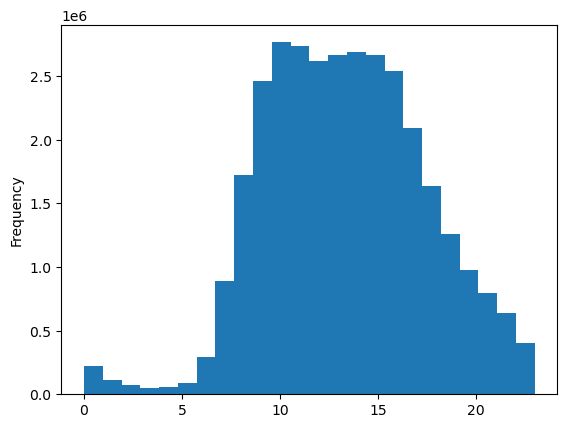

In [47]:
#creating histogram for 'order_hour_of_day'
hist = df['order_hour_of_day'].plot.hist(bins = 24)

### Comments: 
The busiest hours for the 10 AM to 5 PM after that there is decline in the numbers.
Most orders occur between 10 AM and 4 PM, peaking around noon. This insight highlights critical hours for operations, ensuring resources such as customer support and delivery services are optimized during peak times.

### Bar Chart: Loyalty Flag Distribution

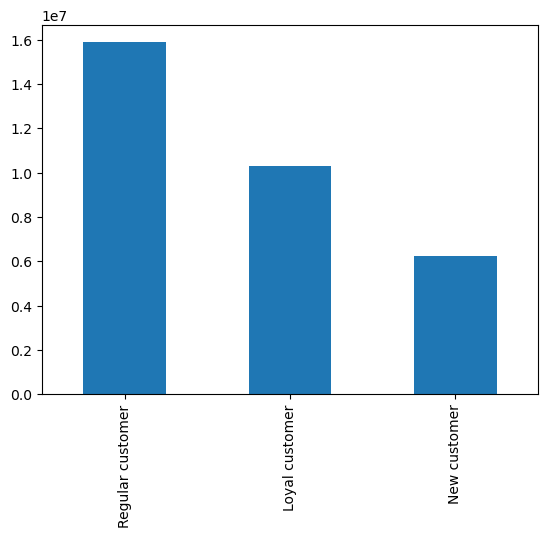

In [48]:
#creating a bar chart for "loyalty_flag"
bar = df['loyalty_flag'].value_counts().plot.bar()

### Comments: Bar Chart: Loyalty Flag Distribution
The chart illustrates a significant dominance of loyal customers compared to regular and new customers. This demonstrates a strong base of repeat buyers, emphasizing the importance of nurturing loyalty programs to maintain engagement and retention.

### Line Chart: Prices vs. Order Hour of Day

In [49]:
#creating a sample of the dataframe
sampled_df = df.sample(n=100000, random_state=1)

In [50]:
#group by hour of the day and calculate the mean expenditure
hourly_expenditure = sampled_df.groupby('order_hour_of_day')['prices'].mean().reset_index()

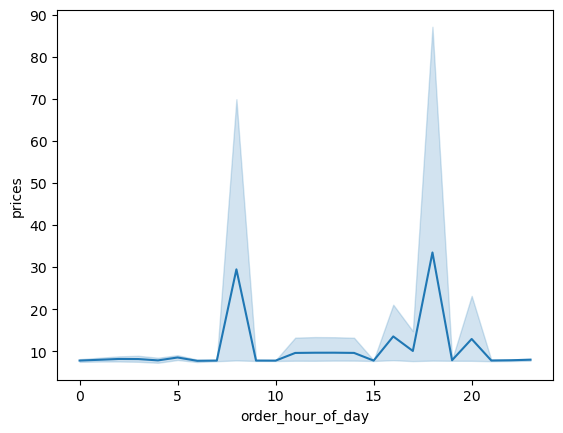

In [51]:
#creating a line chart
line_price_hod = sns.lineplot(data = sampled_df, x = 'order_hour_of_day', y = 'prices')

### Line Chart: Connections between age and number of depentants

In [52]:
# Create a random sample by generating a seed
np.random.seed(4)

In [53]:
# Create a dev list based on the data split we want (70/30)
dev = np.random.rand(len(df)) <= 0.7

In [54]:
# Split the dataframe into two samples
big = df[dev]
small = df[~dev]

In [55]:
# Compare the dataframe length to the sum of the big and small samples
len(df)

32435059

In [56]:
len(big) + len(small)

32435059

In [57]:
# Reduce the samples to only the columns needed
instacart_2 = small [['order_hour_of_day','prices']]

In [58]:
# Check if the subset of the sample was made properly
instacart_2.head(5)

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0


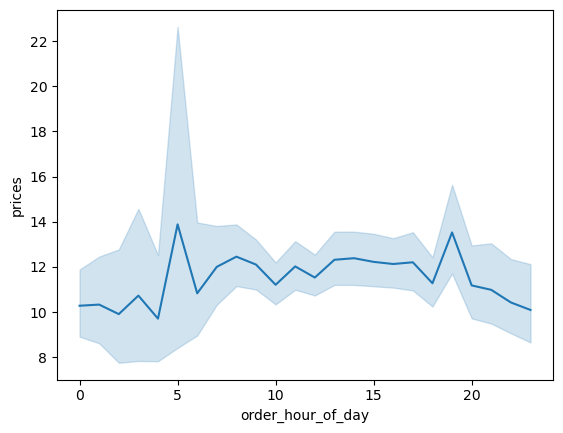

In [59]:
# Create a line chart
line = sns.lineplot(data = instacart_2, x = 'order_hour_of_day',y = 'prices')

### Comments: 
**Line Chart: Prices vs. Order Hour of Day**

Spikes in prices are observed during early morning (around 7 AM) and evening (around 5 PM), indicating higher-value transactions during these times. This may correlate with customers purchasing more expensive or bulk items during these hours, possibly influenced by work schedules.

### Line Chart: Age vs. Number of Dependents

In [60]:
sampled_df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'Unnamed: 0',
       'product_name', 'aisle_id', 'department_id', 'prices', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'First Name', 'Last Name', 'Gender', 'State',
       'Age', 'Date Joined', 'Number of Dependents', 'Family Status',
       'Income'],
      dtype='object')

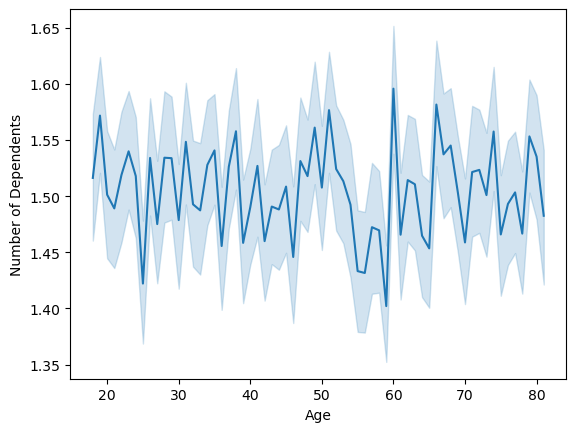

In [61]:
#creating a line chart
line_age_nod = sns.lineplot(data = sampled_df, x = 'Age', y = 'Number of Dependents')

### Comments: 
**Line Chart: Age vs. Number of Dependents**

The number of dependents is relatively stable across age groups, with minor fluctuations. This suggests that household composition does not drastically vary with age, making it a consistent factor in influencing purchasing behavior.

### Age vs. Income

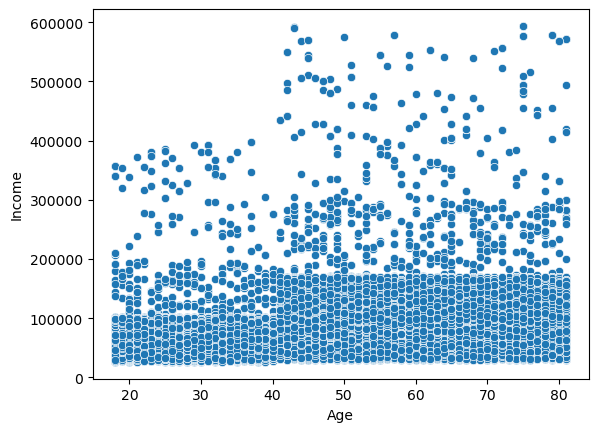

In [63]:
#creating a scatterplot of 'Age' and 'Income'
scatter = sns.scatterplot(x='Age', y='Income', data=sampled_df)

In [69]:


# Define the main folder path
# path = r'/Users/ashwanisherawat/Downloads/Instacart Basket Analysis/02 Data'

# Define subfolders and file name
save_path = os.path.join(path, '04 Analysis', 'Visualizations')
file_name = 'hist_order_hour_of_day.png'

# Ensure the subfolder exists
os.makedirs(save_path, exist_ok=True)

# Save the image
hist.figure.savefig(os.path.join(save_path, file_name))
# Confirmation
print(f"Image saved at: {os.path.join(save_path, file_name)}")


Image saved at: /Users/ashwanisherawat/Downloads/Instacart Basket Analysis/02 Data/04 Analysis/Visualizations/hist_order_hour_of_day.png


In [76]:
#exporting and saving image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [77]:
#exporting and saving image
line_price_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hour_of_day.png'))

In [78]:
#exporting and saving image
line_age_nod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_number_of_dependents.png'))

In [80]:
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'change_in_spending_power_over_age.png'))